**Malaria Detection with test accuracy of 95%, without Image Augumentation**

**Importing Libraries**

In [1]:
from PIL import Image
import numpy as np
import os
import cv2
import keras
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator 
import tensorflow.keras.layers as Layers
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizers
import sklearn.utils as shuffle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Using TensorFlow backend.


**Parasitized is given the label of 0 and Uninfected is given the label of 1**

In [2]:
Images = []
Labels = []
Parasitized = os.listdir("../input/cell-images-for-detecting-malaria/cell_images/Parasitized/")
for p in Parasitized:
    try:
        image = cv2.imread("../input/cell-images-for-detecting-malaria/cell_images/Parasitized/" + p)
        images = Image.fromarray(image, 'RGB')
        images = images.resize((150,150))
        Images.append(np.array(images))
        Labels.append(0)
    except AttributeError:
        print('')
Uninfected = os.listdir("../input/cell-images-for-detecting-malaria/cell_images/Uninfected/")
for u in Uninfected:
    try:
        image = cv2.imread("../input/cell-images-for-detecting-malaria/cell_images/Uninfected/" + u)
        images = Image.fromarray(image, 'RGB')
        images = images.resize((150,150))
        Images.append(np.array(images))
        Labels.append(1)
    except AttributeError:
        print('')

In [3]:
Images = np.array(Images)
Labels = np.array(Labels)    

In [4]:
print(Images.shape)
print(Labels.shape)

(27558, 150, 150, 3)
(27558,)


In [5]:
def show_images(image, label):
    fig = plt.figure(figsize = (10,10))
    fig.suptitle('25 Images from the dataset' ,fontsize = 20)
    for i in range(25):
        index = np.random.randint(Images.shape[0])
        plt.subplot(5,5,i+1)
        plt.imshow(image[index])
        plt.xticks([]) #Scale doesn't appear
        plt.yticks([]) #Scale doesn't apper
        plt.title((label[index]))
        plt.grid(False)
    plt.show()

**Displaying Images from the dataset**

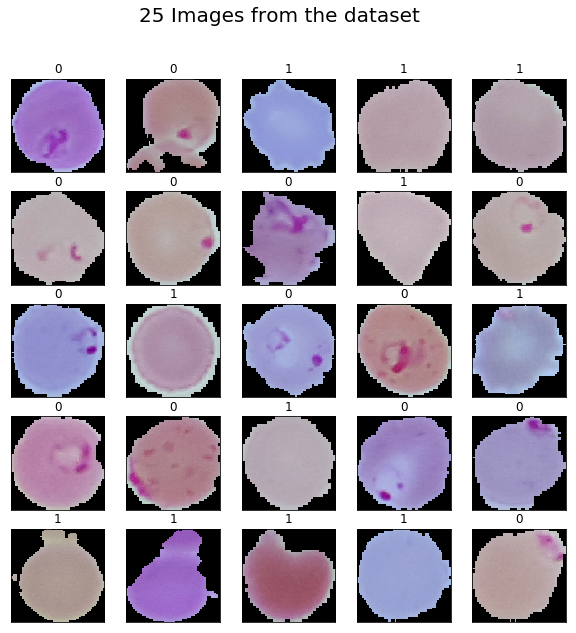

In [6]:
show_images(Images, Labels)

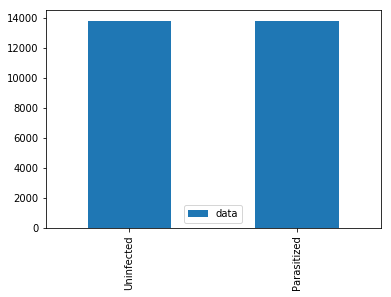

In [7]:
category = ['Uninfected', 'Parasitized']
_,count = np.unique(Labels, return_counts = True)
pd.DataFrame({'data': count}, index = category).plot.bar()
plt.show()

In [8]:
Labels = keras.utils.to_categorical(Labels, 2)

In [9]:
train_x,test_x, train_y, test_y = train_test_split(Images,Labels, test_size = 0.4, random_state = 100)

**CNN Network**

In [19]:
model = Models.Sequential()
model.add(Layers.Conv2D(64, kernel_size = (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(Layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(Layers.MaxPool2D(3,3))
model.add(Layers.Dropout(0.2))
model.add(Layers.Conv2D(64, kernel_size = (3,3) , activation = 'relu'))
model.add(Layers.Conv2D(64, kernel_size = (3,3) , activation = 'relu'))
model.add(Layers.MaxPool2D(3,3))
model.add(Layers.Conv2D(64, kernel_size = (3,3) , activation = 'relu'))
model.add(Layers.Conv2D(64, kernel_size = (3,3) , activation = 'relu'))
model.add(Layers.MaxPool2D(3,3))
model.add(Layers.Flatten())
model.add(Layers.Dense(512, activation = 'relu'))
model.add(Layers.Dense(256, activation = 'relu'))
model.add(Layers.Dropout(0.2))
model.add(Layers.Dense(2, activation = 'softmax'))
model.compile(optimizer = Optimizers.RMSprop(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 146, 146, 64)      36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)       

In [20]:
trained = model.fit(train_x, train_y, epochs = 20, batch_size = 50, validation_split = 0.20, verbose = 1)

Train on 13227 samples, validate on 3307 samples
Epoch 1/20
13227/13227 [==============================] - 18s 1ms/sample - loss: 0.7791 - accuracy: 0.5800 - val_loss: 0.5869 - val_accuracy: 0.6955
Epoch 2/20
13227/13227 [==============================] - 17s 1ms/sample - loss: 0.3705 - accuracy: 0.8486 - val_loss: 0.2814 - val_accuracy: 0.9196
Epoch 3/20
13227/13227 [==============================] - 17s 1ms/sample - loss: 0.2445 - accuracy: 0.9167 - val_loss: 0.2338 - val_accuracy: 0.9335
Epoch 4/20
13227/13227 [==============================] - 17s 1ms/sample - loss: 0.2124 - accuracy: 0.9301 - val_loss: 0.2826 - val_accuracy: 0.9093
Epoch 5/20
13227/13227 [==============================] - 17s 1ms/sample - loss: 0.1913 - accuracy: 0.9356 - val_loss: 0.2750 - val_accuracy: 0.9156
Epoch 6/20
13227/13227 [==============================] - 17s 1ms/sample - loss: 0.1740 - accuracy: 0.9419 - val_loss: 0.1739 - val_accuracy: 0.9441
Epoch 7/20
13227/13227 [==============================] -

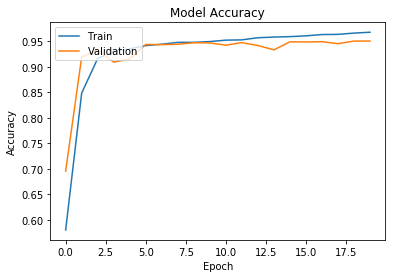

In [21]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc = "upper left")
plt.show()

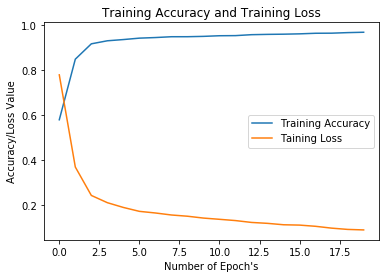

In [27]:
plt.plot(range(20), trained.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(20), trained.history['loss'], label = 'Taining Loss')
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")
plt.show()

In [22]:
result = model.evaluate(test_x,test_y,verbose = 1)

11024/11024 [==============================] - 5s 436us/sample - loss: 0.2107 - accuracy: 0.9501


In [23]:
print("Test Accuracy: " , result[1] * 100)

Test Accuracy:  95.01088261604309


**In few days I will update the kernel with Image Augumentation to improve the results**